# 优化和深度学习
优化算法关注的是最小化损失函数，但是在深度学习中，我们在有限数据量的情况下要找到一个合适的模型。

优化目标是减少训练集误差，深度学习和统计推断的目标是减少泛化误差，为了实现后者，要用优化的方法来减少训练误差，还要注意过拟合。

In [2]:
#
%matplotlib inline
import numpy as np
import torch as t
import mpl_toolkits.mplot3d as mplot3d
import sys
sys.path.append("../")
from pltutils import *


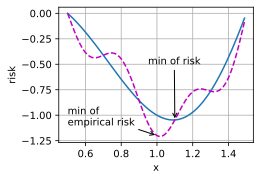

In [2]:
def f(x:t.Tensor)->t.Tensor:
    return x*t.cos(np.pi*x)
def g(x:t.Tensor)->t.Tensor:
    return f(x)+0.2*t.cos(5*np.pi*x)

x=t.arange(0.5,1.5,0.01)
set_figsize((4.5,2.5))
plot(x,[f(x),g(x)],"x","risk")
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))


# 优化的挑战

深度学习优化存在许多挑战

其中最令人烦恼的是

1. 局部最小值
2. 鞍点
3. 梯度消失

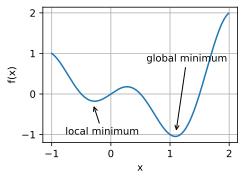

In [3]:
x = torch.arange(-1.0, 2.0, 0.01)
plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))


深度学习模型的目标函数通常有许多局部最优解，随着目标函数解得梯度接近或者变成0，最终迭代获得的数值解可能是一个局部最优解，需要一定程度的噪声才能够超出局部最小值。

# 鞍点也是梯度消失的另一个原因
鞍点 saddle point 是指函数的所有梯度都消失但既不是全局最小也不是局部最小的任何位置。


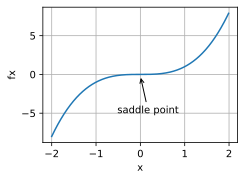

In [4]:
x=t.arange(-2.0,2.,0.01)
plot(x,[x**3],"x","fx")
annotate("saddle point",(0,-0.2),(-0.52,-5.0))

Text(0.5, 0, 'y')

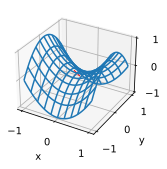

In [7]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101), indexing="xy")
z = x**2 - y**2

ax = plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y')


最隐蔽的问题是梯度消失，f(x)=tanh(x)

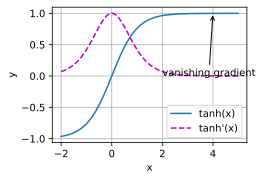

In [10]:
x=t.arange(-2,5,0.01)
plot(x,[t.tanh(x),1-t.tanh(x)**2],"x","y",legend=["tanh(x)","tanh'(x)"])
annotate('vanishing gradient', (4, 1), (2, 0.0))


# Convexity 凸性
在优化算法中，凸性起到至关重要的作用，因为在这种情况下对算法进行分析和测试要容易得多

换言之，算法在凸性条件设定下的效果很差，通常很难在其他条件下看到好的结果。

凸优化的一个很好的特性是能够让我们有效地处理约束（constraints），能有效解决约束优化问题：
\begin{split}\begin{aligned} \mathop{\mathrm{minimize~}}_{\mathbf{x}} & f(\mathbf{x}) \\
    \text{ subject to } & c_i(\mathbf{x}) \leq 0 \text{ for all } i \in \{1, \ldots, N\}.
\end{aligned}\end{split}



此外，在继续训练的时候，我们不仅仅要恢复网络的权重，而且还要恢复优化器的参数，还要恢复随机种子，这样才能完全地还原现场

In [ ]:
import torch.optim as optim
import torchvision as tv
net = tv.models.AlexNet()
optimizer = optim.Adam(net.parameters(), lr=0.001)
optimizer.state_dict()
